In [1]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
agg_path = '../../data/agg_unigram/'

In [3]:
# fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [4]:
fandom_list = [i for i in os.listdir(agg_path) if 'tsv' in i]

In [5]:
fandom_list

['arthurian_mythology_&_related_fandoms_agg_cos.tsv',
 'attack_on_titan_agg_cos.tsv',
 'bishoujo_senshi_sailor_moon_agg_cos.tsv',
 'buffy_the_vampire_slayer_agg_cos.tsv',
 'dcu_agg_cos.tsv',
 'doctor_who_&_related_fandoms_agg_cos.tsv',
 'dragon_age_all_media_types_agg_cos.tsv',
 'haikyuu_agg_cos.tsv',
 'hamilton_miranda_agg_cos.tsv',
 'harry_potter_agg_cos.tsv',
 'hetalia_axis_powers_agg_cos.tsv',
 'homestuck_agg_cos.tsv',
 'kuroko_no_basuke_agg_cos.tsv',
 'les_miserables_all_media_types_agg_cos.tsv',
 'marvel_agg_cos.tsv',
 'ms_paint_adventures_agg_cos.tsv',
 'naruto_agg_cos.tsv',
 'one_direction_agg_cos.tsv',
 'shakespare_william_works_agg_cos.tsv',
 'sherlock_holmes_&_related_fandoms_agg_cos.tsv',
 'star_wars_all_media_types_agg_cos.tsv',
 'supernatural_agg_cos.tsv',
 'the_avengers_all_media_types_agg_cos.tsv',
 'the_walking_dead_&_related_fandoms_agg_cos.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv']

In [6]:
df = pd.read_csv(os.path.join(agg_path,'arthurian_mythology_&_related_fandoms'+'_agg_cos.tsv'), sep = '\t')

In [7]:
df.head(2)

,Author,Hits,Kudos,Title,Words,Bookmarks,CompleteDate,Chapters,UpdateDate,PublishDate,Comments,completed_in_days,Cos
0,CaptainJacq,10372.0,279.0,Graphite Rain: A Love Story in Twelve Parts,144443.0,1188,1547.0,144,NaN,1547,66,0.0,0.016928
1,Afterstory,352.0,15.0,All the King\'s Virtues,49627.0,56,NaN,64,461.0,634,6,NaN,0.016305


In [8]:
df.columns.values

array(['Author', 'Hits', 'Kudos', 'Title', 'Words', 'Bookmarks',
       'CompleteDate', 'Chapters', 'UpdateDate', 'PublishDate', 'Comments',
       'completed_in_days', 'Cos'], dtype=object)

In [9]:
def create_df(fname):
    ### Create table: merge the one with JSD and the master table w/ old KL
    ### Only keep the numeric variables
    df = pd.read_csv(os.path.join(agg_path,fname), sep = '\t')
    df['Cosine_distance'] = df['Cos']
    df = df[['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']]
#     df = df.fillna(0)
    return df

In [10]:
df_all = []
for fandom in fandom_list:
    # for some we don't have the master table.
    df_all.append(create_df(fandom))
    print ('did: ', fandom)

df_all = pd.concat(df_all)

did:  arthurian_mythology_&_related_fandoms_agg_cos.tsv
did:  attack_on_titan_agg_cos.tsv
did:  bishoujo_senshi_sailor_moon_agg_cos.tsv
did:  buffy_the_vampire_slayer_agg_cos.tsv
did:  dcu_agg_cos.tsv
did:  doctor_who_&_related_fandoms_agg_cos.tsv
did:  dragon_age_all_media_types_agg_cos.tsv
did:  haikyuu_agg_cos.tsv
did:  hamilton_miranda_agg_cos.tsv
did:  harry_potter_agg_cos.tsv
did:  hetalia_axis_powers_agg_cos.tsv
did:  homestuck_agg_cos.tsv
did:  kuroko_no_basuke_agg_cos.tsv
did:  les_miserables_all_media_types_agg_cos.tsv
did:  marvel_agg_cos.tsv
did:  ms_paint_adventures_agg_cos.tsv
did:  naruto_agg_cos.tsv
did:  one_direction_agg_cos.tsv
did:  shakespare_william_works_agg_cos.tsv
did:  sherlock_holmes_&_related_fandoms_agg_cos.tsv
did:  star_wars_all_media_types_agg_cos.tsv
did:  supernatural_agg_cos.tsv
did:  the_avengers_all_media_types_agg_cos.tsv
did:  the_walking_dead_&_related_fandoms_agg_cos.tsv
did:  tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv


In [11]:
len(df_all)

22045

In [12]:
# for col in df_all.columns.values:
#     df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [13]:
# df_all = df_all.fillna(0.001)

In [14]:
# set(df_all.Kudos.tolist())

In [15]:
df_all.to_csv('regression_data.csv', index=False)

In [16]:
df_all.columns.values

array(['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters',
       'PublishDate', 'Cosine_distance'], dtype=object)

In [17]:
# for n in df_all.columns.values:
#     df_all[n] = np.log(df_all[n])
    

In [18]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')


In [19]:
df_all

,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
0,10372.0,279.0,144443.0,1188,66,144,1547,0.016928
1,352.0,15.0,49627.0,56,6,64,634,0.016305
2,3621.0,188.0,15258.0,23,13,1,2020,0.015692
3,3332.0,94.0,4349.0,17,10,1,2602,0.015722
4,2980.0,62.0,1907.0,8,1,1,1601,0.246092
5,638.0,44.0,13049.0,18,15,9,998,0.015240
6,647.0,13.0,689.0,0,1,1,1042,0.307533
7,3388.0,68.0,42114.0,192,18,600,838,0.015370
8,1978.0,64.0,607.0,11,6,1,2092,0.045275
9,1354.0,20.0,754.0,4,1,1,1453,0.044024


In [20]:
x = df_all[['Words','Chapters', 'PublishDate', 'Cosine_distance']]
y = np.log(df_all['Kudos'])
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Wed, 13 Sep 2017   Prob (F-statistic):               0.00
Time:                        13:47:30   Log-Likelihood:                -48802.
No. Observations:               22045   AIC:                         9.761e+04
Df Residuals:                   22041   BIC:                         9.764e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Words            3.007e-05   6.84e-07     

In [165]:
x = df_all['Cosine_distance']
y = np.log(df_all['Kudos'])
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                 1.517e+04
Date:                Wed, 06 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:34:49   Log-Likelihood:                -62102.
No. Observations:               25000   AIC:                         1.242e+05
Df Residuals:                   24999   BIC:                         1.242e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Cosine_distance     9.5841      0.078    1

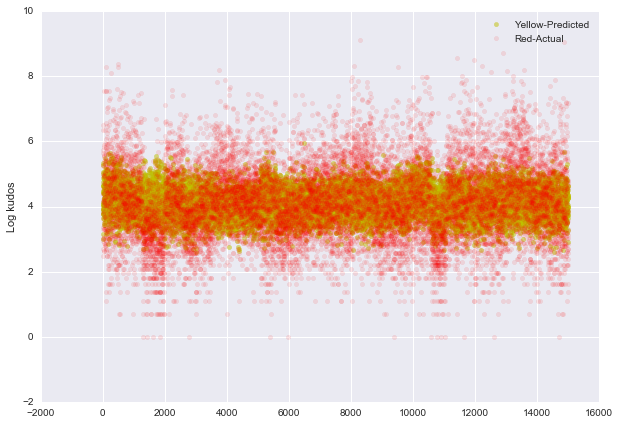

In [133]:
plt.figure(figsize = (10, 7))
y_pred = result.predict(x)
xrange = np.arange(len(x))
s1 = plt.scatter(xrange, y_pred, color = 'y', alpha = 0.5, label = "Yellow-Predicted")
s2 = plt.scatter(xrange, y, color = 'r', alpha = 0.1, label = "Red-Actual")
plt.legend([s1, s2], [ "Yellow-Predicted", "Red-Actual"])
plt.ylabel("Log kudos")
plt.savefig("ols_actual_predicted.png", format='png')

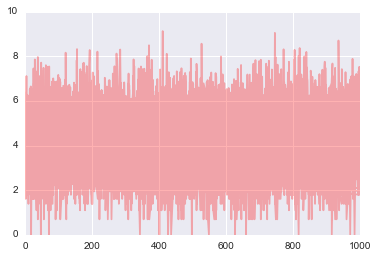

In [32]:
b

2.1977262615473423

In [25]:
for fandom in fandom_list:
    df = pd.read_csv(os.path.join(agg_path,fandom), sep = '\t')
    exog = np.log(df['Cos'])
    endog = np.log(df['Kudos'])
    mod_nbin = sm.OLS(endog, exog)
    res_nbin = mod_nbin.fit()
    print(fandom)
    print(res_nbin.summary())

arthurian_mythology_&_related_fandoms_agg_cos.tsv
                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     5767.
Date:                Mon, 04 Sep 2017   Prob (F-statistic):               0.00
Time:                        16:36:59   Log-Likelihood:                -1816.7
No. Observations:                1000   AIC:                             3635.
Df Residuals:                     999   BIC:                             3640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Co